In [13]:
from scipy.special import gammaincc, gamma
from matplotlib import pyplot as plt
from funciones import *
from numpy import pi
import numpy as np
from numpy import exp
import tqdm
from scipy.special import exp1
import pandas as pd

In [2]:
def casimir_fuerza(a,y):
    delta_y2 = ((y.max(axis = 1) - y.min(axis = 1))**2).mean()
    return - delta_y2 / (8* (np.pi) * a**2)

In [3]:
y = generar_lineas(n_lines =10**3, N = 10**3, y0 = 0, yN = 0)
deltas = (y.max(axis = 1) - y.min(axis = 1))

# Vamos a ver como se acomoda el resultado teorico al experimental

In [4]:
F_teorica_a2 = -np.pi / (24)
F_teorica_a2

-0.1308996938995747

In [5]:
distancia = np.linspace(0.1,0.6,100)

fuerza_teorica_a2 = -np.pi / 24
fuerza_teorica    = fuerza_teorica_a2 / (distancia**2)

# Vamos a medir como se parece lo teorico con lo numerico

In [32]:
df = pd.DataFrame()

n_lines_, N_ = [10000,1000, 100, 10000,1000, 100, 10000,1000, 100], [10000,10000, 10000, 1000,1000, 1000,100,100,100]

for n_lines, N in zip(n_lines_, N_):
    
    y = generar_lineas(n_lines =n_lines, N = N, y0 = 0, yN = 0)
    casimir_fuerza(1, y)
    
    error = np.abs((casimir_fuerza(1, y) - F_teorica_a2) / F_teorica_a2)
    df = df.append({'n_lines':n_lines,'N':N,'error':error}, ignore_index = True)
    
    
    print(n_lines, N, error)

10000 10000 0.024243823283623154
1000 10000 0.005097212564010534
100 10000 0.07628618139049614
10000 1000 0.05369597733007167
1000 1000 0.07725698570397484
100 1000 0.12308169756271084
10000 100 0.16734478382644039
1000 100 0.17557186380823872
100 100 0.2018099169968687


Text(0.5, 0, 'N puntos por loop')

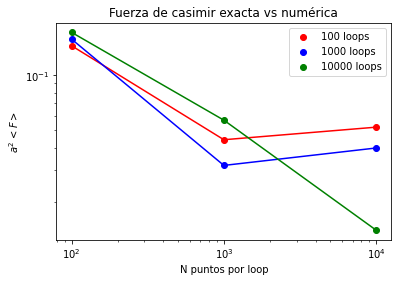

In [30]:
for n_loops,c  in zip([100,1000,10000],['r','b','g']):

    df_aux = df.loc[df['n_lines'] == n_loops]
    
    plt.plot(df_aux['N'], 
             df_aux['error'], 
#              label = '{} loops'.format(n_loops), 
             c = c)
    
    plt.scatter(df_aux['N'], 
             df_aux['error'], 
             label = '{} loops'.format(n_loops), 
             c = c)
    
plt.xscale('log')

plt.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.yscale('log')

plt.title('Fuerza de casimir exacta vs numérica')
plt.ylabel('$ a^2 \, <F>$')
plt.xlabel('N puntos por loop')

In [55]:
n_lines_, N_ = [100000,10000], [10000,100000]

for n_lines, N in zip(n_lines_, N_):
    
    y = generar_lineas(n_lines =n_lines, N = N, y0 = 0, yN = 0)
    casimir_fuerza(1, y)
    
    print(n_lines, N, np.abs((casimir_fuerza(1, y) - F_teorica_a2) / F_teorica_a2))

100000 10000 0.017050692687314996
10000 100000 0.0002469800786256464


### Graficar las dos curvas juntas

In [31]:
y = generar_lineas(n_lines = 1000, N = 1000, y0 = 0, yN = 0)
fuerza_numerica = casimir_fuerza(distancia,y)

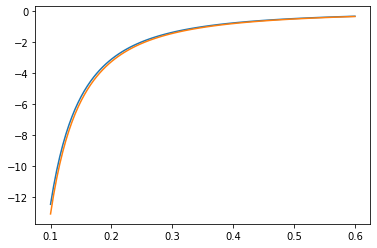

In [32]:
plt.plot(distancia,fuerza_numerica)
plt.plot(distancia,fuerza_teorica)

plt.show()

In [33]:
def casimir_fuerza(a,y):
    delta_y2 = ((y.max(axis = 1) - y.min(axis = 1))**2)
    return - delta_y2 / (8* (np.pi) * a**2)

In [34]:
valores_medios = []
errores = []
for a in distancia:
    valores_medios.append(casimir_fuerza(a,y).mean())
    errores.append(casimir_fuerza(a,y).std())
    
errores = np.array(errores)
valores_medios = np.array(valores_medios)

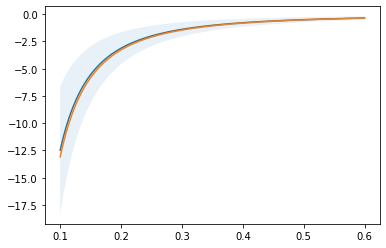

In [36]:
plt.plot(distancia, valores_medios)
plt.plot(distancia,fuerza_teorica)

plt.fill_between(distancia, valores_medios - errores, valores_medios + errores, 
                 alpha = 0.1, label = '$\\Delta$ F')


plt.show()

# Ver graficamente la convergencia con el numero de loops